### Low CR repeats
Attempting to see repeats needed per coupling rate to get back the strand

In [27]:
%load_ext autoreload
%autoreload 2   

In [14]:
from heirarchal_clustering import make_prediction
from synthesis import NaiveSynthesisModel
from Levenshtein import ratio, distance
from cluster_merging import majority_merge
from utils import get_recovery_percentage, align
from random import sample
from tqdm import tqdm
import numpy as np
from heirarchal_clustering import cluster_trivial
import matplotlib.pyplot as plt
import utils

In [2]:
synthesis_model = NaiveSynthesisModel(coupling_rate=0.8, strand_length=200, repeats=10000, capping=False)

In [3]:
strands, ids = synthesis_model.simulate_synthesis()

In [4]:
original_strand = synthesis_model.strand

In [5]:
original_strand

'GCCAAGGACACTCAAGTCGGCGTATGTACGCTCAAGAAGTATCAACAGCGGTACATTAGCGGGAAACCGTGTATCAGCTCAGGGAAGTGCCTTATTTAAGTGTATCTGTCAATCATTGGACAGACATTGCAGATCCTGATTAGACCCTTAATAAGCATGGCAGTGGGTTAAGAGGCGAGCGGCTCGCAGACGGCAATATC'

In [46]:
# Cluster similar reads together, see how many repeats it takes within a cluster to get it back
clusters, clustered_seqs, centroids = cluster_trivial(strands, distance_threshold=40)


Total strands 10000


100%|██████████| 10000/10000 [00:02<00:00, 4128.06it/s]

Number of clusters = 496


In [47]:
clusters, clustered_seqs, centroids = utils.sort_clusters(clusters, clustered_seqs, centroids)

(array([479.,   8.,   3.,   1.,   2.,   0.,   1.,   1.,   0.,   1.]),
 array([1.0000e+00, 1.2280e+02, 2.4460e+02, 3.6640e+02, 4.8820e+02,
        6.1000e+02, 7.3180e+02, 8.5360e+02, 9.7540e+02, 1.0972e+03,
        1.2190e+03]),
 <BarContainer object of 10 artists>)

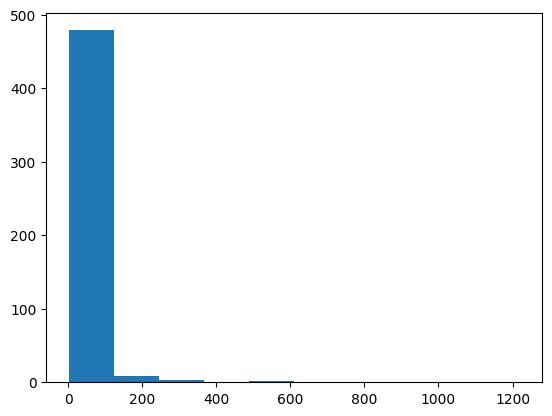

In [48]:
plt.hist([len(i) for i in clusters])

In [54]:

candidates = []
for i in range(10):
    candidate = make_prediction(clustered_seqs[0], 15)
    candidates.append(candidate)
    print(distance(candidate, original_strand))

print()
candidate = make_prediction(candidates, 5)
print(distance(candidate, original_strand))

33
31
32
28
30
30
24
28
31
30

29


In [ ]:

# Iterating over coupling rates

coupling_rates = np.arange(1.0, 0.8, -0.005)
n_repeats_for_full_recovery = []
#print(coupling_rates)

for cr in coupling_rates:
    synthesis_model = NaiveSynthesisModel(coupling_rate=cr, strand_length=200, repeats=500, capping=False)
    original_strand = synthesis_model.strand
    strands, ids = synthesis_model.simulate_synthesis()
    for i in range(1, 500, 10):
        
        if i > 40:
            candidates = []
            for k in range(0, i, 5):
                if k + 40 > i:
                    candidates.append(make_prediction(strands[k: i], sample_size=i-k))
                else:
                    candidates.append(make_prediction(strands[k: k + 40]))
            candidate = make_prediction(candidates, len(candidates))
            #candidate = majority_merge(candidates, weight=0)
        else:
            sampled_strands = sample(strands, i)
            candidate = make_prediction(sampled_strands, len(sampled_strands))
        
        edit_distance = distance(candidate, original_strand)
        recovery = get_recovery_percentage(candidate, original_strand)

        if recovery == 1.0:
            print(f"Coupling rate {cr}, strands reqd {i}")
            n_repeats_for_full_recovery.append(i)
            break

        #print(edit_distance)
        #print(recovery)
        #print(align(candidate, original_strand, identity=False).format())
        #print()

[1.    0.995 0.99  0.985 0.98  0.975 0.97  0.965 0.96  0.955 0.95  0.945
 0.94  0.935 0.93  0.925 0.92  0.915 0.91  0.905 0.9   0.895 0.89  0.885
 0.88  0.875 0.87  0.865 0.86  0.855 0.85  0.845 0.84  0.835 0.83  0.825
 0.82  0.815 0.81  0.805]
Coupling rate 1.0, strands reqd 1
Coupling rate 0.995, strands reqd 11
Coupling rate 0.99, strands reqd 11
Coupling rate 0.985, strands reqd 11
Coupling rate 0.98, strands reqd 11
Coupling rate 0.975, strands reqd 1
Coupling rate 0.97, strands reqd 11
Coupling rate 0.965, strands reqd 11
Coupling rate 0.96, strands reqd 11
Coupling rate 0.955, strands reqd 21
Coupling rate 0.95, strands reqd 11
Coupling rate 0.945, strands reqd 11
Coupling rate 0.94, strands reqd 21
Coupling rate 0.9349999999999999, strands reqd 31
Coupling rate 0.9299999999999999, strands reqd 71
Coupling rate 0.9249999999999999, strands reqd 31
Coupling rate 0.9199999999999999, strands reqd 71
Coupling rate 0.9149999999999999, strands reqd 151
Coupling rate 0.9099999999999999,

KeyboardInterrupt: 